# LDA example

In [16]:
import re
import math
import jieba
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [80]:
political_news1 = u'''
美國總統當選人川普接受福斯新聞（Fox News）專訪，直指除非中國大陸在貿易等事項上讓步，否則他不知道為什麼美國要遵守「一個中國」政策。總統府發言人黃重諺今天表示，不會評論川普的談話。

不過，在媒體追問下，黃重諺也說，國家的終極利益是自由民主的確保，以及在國際關係上有更多、更好的參與，包括國際地位獲得保障，「只要有助於這兩個層面，我們都樂見」。

對川普談話及政策走向，國安單位是否有所準備或因應？黃重諺說，美國大選之後，總統當選人、新的政府團隊，各項政策轉變和調整，以及整體政策走向，我國包括國安、經濟、處理對外經貿部門等各單位，都有相關的資訊蒐集；美國總統大選結束後，也跟未來新政府的團隊展開溝通。

不具名的府方人士則分析，我方因應的重點在於：自由民主體制會不會受到變更？國際關係或更進一步的國際參與、既有國際地位的確保，會不會受到影響？如果這兩大層面都不受影響，「我們就維持一個整體的動態平衡」。

府方人士還指出，有很多人提出美國把台灣當「籌碼」，但小國有小國的策略、大國有大國的策略，如果能守住台灣的終極利益，就沒有「是不是變成棋子」的問題。

對於美國選舉前後、個人或外交團隊的政策調子，府方人士強調「都會了解，且有一定的預判、分析」。會不會覺得川普難以捉摸？他說，「大好或大壞，人的行為基本上都可以預測」。
'''

political_news2 = u'''
美國總統當選人川普的談話顯示，他可能把美國的「一中政策」當成談判籌碼。紐約時報今天分析，若中國大陸奉陪，手上也有不少牌可以跟美國玩。
川普（Donald Trump）日前接受福斯新聞網（FoxNews）訪問時說：「我完全了解『一個中國政策』，但我不知道我們為什麼要受『一個中國政策』朿縛，除非我們能就包括貿易在內的其他事項與中國達成協議。」

白宮發言人厄尼思特（Josh Earnest）今天表示，歐巴馬政府從來沒把台灣當成籌碼，若把台灣當籌碼，難以符合台灣的利益；中國大陸外長王毅也表示，如果試圖破壞「一中」原則、損害大陸的核心利益，「最終只能是搬起石頭砸自己的腳」。

紐約時報（New York Times）整理出以下幾張握在中國大陸手上、足以讓川普政府焦頭爛額的牌：

● 經貿與投資
中國大陸分析家表示，大陸有很多手段可以對付川普，其中一個顯眼目標就是波音公司。位於西雅圖的波音，去年9月盛大迎接過大陸領導人習近平參訪。

波音2016年可望交付大陸的飛機價值110億美元，在大陸快速擴展的航線中，大多數飛機都是波音737。大陸的「環球時報」就警告，大陸可以輕而易舉改找波音的對手空中巴士做生意。

大陸還可以下令國有企業與民眾企業家放緩投資美國。據位於紐約的經濟政策分析機構「榮鼎集團」（Rhodium Group）近期的研究顯示，自2015年，中國大陸對美的直接投資數額，已超過美國對大陸的投資。

● 重新經援北韓
川普11日受訪時說：「坦白講，在北韓議題上，中國也沒有幫我們忙」。但紐時指出，在美國部分遏止北韓核計畫的措施中，大陸事實上採取合作，特別是支持上個月聯合國檢查北韓煤礦外匯收入的經濟制裁。煤礦是北韓最大的外銷收入。

紐時指出，中國大陸可以再變回北韓親密鄰居的角色，藉批准貿易、援助與投資，強化北韓經濟，提供北韓一個類似馬歇爾計畫式的大量經援。

● 拉攏伊朗 讓美在中東吃力
伊朗1/3的石油是出口到大陸，伊朗最多的進口貨品是來自大陸。2015年的伊朗核子協議，以撤銷對伊朗制裁換取伊朗放棄98%的核子原料，大陸是協議簽署國之一。

若照川普所言而打破並重啟伊朗核子協議談判，藉放手提振長期盟友伊朗的經濟，大陸可以增加對中東的影響力，達成弱化美國在中東影響力的目標。

● 拿台灣出氣
紐時指出，若中國大陸展開回應，首波懲罰對象較可能是台灣而非美國，以削弱台灣對華府的價值。大陸可以啟動外交戰，加緊挖角包括梵蒂岡在內的中華民國所僅有22個友邦小國，也可以藉更嚴的登陸投資限制，打擊台灣經濟。
'''

political_news3 = '''
美國總統當選人川普11日公開將「一個中國」政策說成是他要求中國在貿易政策做出讓步的籌碼，中共黨媒《環球時報》社評今天（13日）指出，川普大概覺得自己非常有智慧，拿住了中國的「命門」，但實際上，他大大高估了美國主宰世界的能力，不了解美國力量在這個時代的局限性，尤其在台灣海峽，中國現在已經有足夠的信心與美國掰手腕。
環時社評指出，川普的一系列出格發言顯示，他在戰略上藐視中國。驕兵必敗，他人還沒進白宮就已經亮出了敲詐中國的底牌。然而在射出了針對「一個中國」政策的這支箭之後，他的戰略主動性就已經預支了一大半。

文中指出，北京應當從嚴懲「台獨」勢力做起。台灣當局配合美國衝擊「一個中國」政策，讓我們重新認識「台獨」的長遠危害。進一步打擊「台獨」勢力，也成為中國大陸更緊迫的課題。北京需要加大對「台獨」的全面施壓，探討通過非和平手段給「台獨」不同程度懲罰的可能性。「我們需要有能力在必要時將台灣『黎巴嫩化』，並且讓通過武力徹底收復台灣成為真實的選項之一。」

社評表示，如果川普被身邊人忽悠，真要玩一把「殺敵一千自損八百」的狂野遊戲，中國就應堅決奉陪。對美國來說這是國內支持嚴重不足的一次莫名其妙的「遠征」，對中國來說，這是捍衛自己核心利益的決定性一戰，中方絕不可能失敗。

文中表示，川普是個不按常理出牌的人，與他打交道，中國需要外交想像力。我們也要敢於採取出其不意的行動，對美形成「你打你的，我打我的」新格局。最重要的是不要擔心白宮新主人不高興。他反復刺激別人，如果反過來不受到羞辱，恐怕他自己都會感到奇怪。

社評指出，川普這些天不斷為自己「入主白宮」造勢，他大概想有一個前所未有的豪華「登基」，那就是朝聖的萬邦將貢品提前給他擺好，迎接美利堅也是世界歷史上擁有前所未有威嚴的「川普大帝」。但美國很多有識之士都在以嘲笑的心態看待川普的表演。他們尤其不會為此跟隨他南征北戰，進入一個走向斷崖式混亂的新世界。

最後文中指出，「中國不會以交保護費的方式苟且偷安，從毛澤東時代開始，我們從沒有對外屈服過。現在是中美實力相差最小的時代，我們有什麼理由從川普手裡接下一份對中國來說最不平等、甚至能讓我們感到屈辱的協議呢？」
'''

In [108]:
sport_news1 = u'''
林書豪復出首戰，自己和教頭亞特金森（Kenny Atkinson）都表示，適應球場節奏是當務之急，上半場明顯還在暖機，下半場逐漸進入狀況，可以預期很快就會越來越好。

林書豪復出，籃網並未讓林書豪太快重回球隊頭號進攻組織者角色，幾次進攻來回都是在弱側邊，顯然球隊在他歸隊之出，仍是習慣球場節奏為主。林書豪在第3節暖機完畢之後，單節攻下6分、3助攻，但大多數進攻仍是弱側邊持球切入。

根據統計，林書豪本季數據表現不算特別亮眼，但在先前打過的5場比賽，身為球隊唯一正規主控，進攻端重要性並不亞於聯盟其他頂尖控球。

他的每場平均觸球次數高達89.5次，名列聯盟第6，與沃爾（John Wall）、里拉德（Damian Lillard）等聯盟一線控球次數差不多；而在傳球次數上，林書豪以每場 64.5次名列第5，甚至還超過衛斯特布魯克（Russell Westbrook）。

顯示林書豪先前平均15分、6.2助攻的次數雖然比不上聯盟其他一線控球，但至少在進攻端不僅是球隊最重要的外線持球進攻點，也是球隊唯一的外線合格傳球者。

而在林書豪開季傷退之前，籃網一度是聯盟擋拆比例前5名的球隊，效率也名列前茅，與林書豪持球時的效率是相輔相成；但在歸隊之初，無論是教練或是林書豪本身，都還沒讓球隊做出太多改變。

不過可喜的是，林書豪在下半場慢慢暖機，雖然還沒完全融入球隊體系，幾次切入和送球，看得出侵略性仍在，給小球的傳球視野，並非臨時從得分後衛代打的年輕小將們比得上，相信只要給他更多時間，林書豪很快就能重回狀況。
'''

sport_news2 = u'''
現任NBA火箭隊教頭丹東尼（Mike D'Antoni ）今天領軍在自家主場對上籃網隊，效力籃網的林書豪多年前曾在他執教之下、於紐約「大蘋果」打出著名「林來瘋」身價，談起當初的合作，丹東尼讚美連發，他說：「這是一段非常特別的緣分。」並表示林書豪早就該得到外界肯定。

對於「豪小子」目前站穩NBA殿堂的表現，丹東尼大力稱讚：「沒有人會比我更替他感到開心，他應該得到這些，甚至他應該更早得到肯定。」丹東尼說，他希望自己永遠跟林書豪感情要好，「他對於我的執教也很有幫助，當初我們球隊一灘死水，完全死氣沉沉、傷兵又多，但林來瘋是一個美好的故事。」

林書豪給予丹東尼的體悟就是「不放棄奮鬥」，「繼續奮鬥，老天不會虧待努力的人。」

火箭以122：118擊敗籃網，林書豪傷癒復出攻下10分、7助攻，但並未幫助球隊取勝。
'''

sport_news3 = u'''
「哈佛小子」林書豪（Jeremy Lin）有望歸隊！已經連續缺賽17場的林書豪傳出好消息，美國媒體報導林書豪「可能」會在明天籃網隊出征火箭隊的NBA例行賽中登場；根據紐約媒體指出，林書豪有7成5的機率可上陣，也已經出現在出賽名單中。
紐約媒體用了「probable」來形容林書豪的復出，雖然沒有百分之百肯定，但至少他已經被列出名單中。日前已經參加球隊團隊訓練的林書豪受訪時表示過，自己並不急於出賽對上老東家，一切以健康至上，不過看起來這場對決戲碼很有機會上演。

林書豪本季只打了開季的前5場，戰績為2勝3敗，籃網失去後場攻擊力強大的他之後，戰力直落吞下其後的4勝13敗。雖然總教練亞特金森（Kenny Atkinson）曾表示林書豪的重要性不只是在球場上，但豪小子歸隊仍是籃網重新凝聚戰力的最大幫助。

明天籃網在台灣時間早上9時出戰火箭，這場客場之征也將讓林書豪重回之前效力過的休士頓球場。

【中央社／台北12日綜合報導】

美國「新聞日報」（Newsday）報導指出，因左大腿拉傷，已經缺席17場比賽的NBA台裔球星林書豪，可能在籃網13日於客場挑戰火箭的比賽歸隊。

根據「新聞日報」的報導，美國職籃（NBA）布魯克林籃網隊在昨天以101比130不敵聖安東尼奧馬刺後，今天宣布林書豪「可能」在明天籃網對上休士頓火箭隊一役回到球場的消息。

不過，林書豪將傷癒歸隊出戰前東家火箭一事仍有變數，因為林書豪至今僅參與過1次完整練習，且原定今天進行的訓練也取消。

林書豪於養傷這段期間，在板凳席可沒閒著，他說，雖然無法上場比賽，但他在板凳席可以好好觀察球隊，找出球隊需要他做什麼，或是他需要提供球隊什麼樣的幫助，某種程度來說，這對他和球隊都是有幫助的，所以受傷也不全然是壞事。

林書豪進一步解釋，這段期間他更明白可以和哪些隊友做怎樣的配合，也知道目前的陣容可以設計哪些較好的戰術，當他傷癒復出時，希望帶來更穩定的表現，展現更多領導能力。
'''

In [81]:
def tokenize(news):
    news = jieba.lcut(news)
    news = map(lambda x: filter(lambda y: re.search(ur'[\u4e00-\u9fff]+|[a-z]+', y), x), news)
    news = [i for i in news if i]
    news = filter(lambda x: len(x) > 1, news)
    return news

In [109]:
doc = [political_news1, political_news2, sport_news1, sport_news2]
tf_vectorizer = CountVectorizer(tokenizer=tokenize)
tf_train = tf_vectorizer.fit_transform(doc)

In [110]:
lda = LatentDirichletAllocation(n_topics=2, max_iter=1000,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf_train)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=1000, mean_change_tol=0.001,
             n_jobs=1, n_topics=2, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [84]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i] + "*" + '%.5f' % model.exp_dirichlet_component_[topic_idx,i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print

In [85]:
lda.exp_dirichlet_component_[0].argsort()[:-20 - 1:-1]


array([313, 355, 420, 485, 393, 312, 241, 247, 107, 215,  94, 348, 182,
       425, 271, 102, 354,  31, 331, 133])

In [111]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 20)

Topic #0:
林書豪*0.02301 球隊*0.01771 聯盟*0.00886 進攻*0.00710 籃網*0.00710 林書*0.00710 持球*0.00533 控球*0.00533 助攻*0.00533 得到*0.00533 其他*0.00358 特別*0.00358 完全*0.00358 自己*0.00358 效率*0.00358 切入*0.00358 球場*0.00358 一線*0.00358 每場*0.00358 名列*0.00358

Topic #1:
大陸*0.01425 美國*0.01425 可以*0.01167 政策*0.01166 伊朗*0.01037 台灣*0.01037 中國大陸*0.00907 投資*0.00778 一個*0.00649 我們*0.00649 北韓*0.00649 中國*0.00649 經濟*0.00649 表示*0.00520 波音*0.00519 指出*0.00519 利益*0.00519 分析*0.00519 包括*0.00519 總統*0.00519



- - -

# 如何決定 topic 個數

In [29]:
topic=[]
score_list = []
perplexity_list=[]
for i in range(1, 11):
    _lda = LatentDirichletAllocation(n_topics=i, max_iter=1000,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
    _lda.fit(tf_train)
    score = _lda.score(tf_train)
    perplexity = _lda.perplexity(tf_train)
    topic.append(i)
    score_list.append(score)
    perplexity_list.append(perplexity)
    print 'topic_n:', i, '\ score:', score, '\ perplexity:', perplexity

topic_n: 1 \ score: -5183.34014043 \ perplexity: 615.831970836
topic_n: 2 \ score: -5108.17832988 \ perplexity: 561.065043015
topic_n: 3 \ score: -5109.55115517 \ perplexity: 562.020309184
topic_n: 4 \ score: -5158.23997294 \ perplexity: 596.972527117
topic_n: 5 \ score: -5238.30346055 \ perplexity: 659.23650519
topic_n: 6 \ score: -5190.8148917 \ perplexity: 621.562547123
topic_n: 7 \ score: -5225.98246711 \ perplexity: 649.247957897
topic_n: 8 \ score: -5259.26240084 \ perplexity: 676.582086662
topic_n: 9 \ score: -5290.78296147 \ perplexity: 703.531544957
topic_n: 10 \ score: -5320.68539317 \ perplexity: 730.089065535


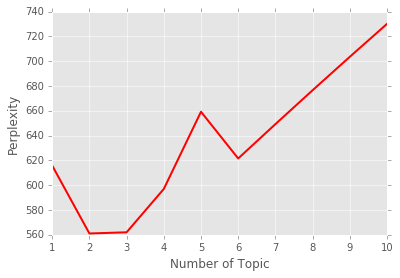

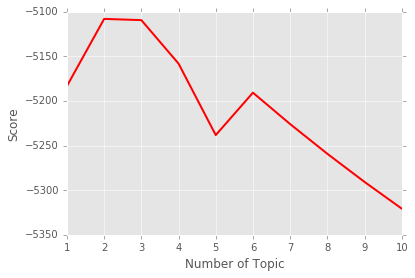

In [32]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams

def graph_draw(topic,perplexity, ylabel):            
    x=topic
    y=perplexity
    plt.plot(x,y,color="red",linewidth=2)
    plt.xlabel("Number of Topic")
    plt.ylabel(ylabel)
    plt.show()
graph_draw(topic,perplexity_list, "Perplexity")
graph_draw(topic,score_list, "Score")

** According to sklearn document ** (http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)

* score : Calculate approximate log-likelihood as score. ** (0 > score > -infinite) ** 

* perplexity : Calculate approximate perplexity for data X. Perplexity is defined as exp(-1 \* log-likelihood per word) ** (infinite > perplexity > 1) **


- - -

# 如何預測新文章屬於哪一個 topic

In [10]:
doc = [political_news3, sport_news3]
tf_test = tf_vectorizer.transform(doc)

In [11]:
doc_topic_dist_unnormalized = np.matrix(lda.transform(tf_test))
doc_topic_dist = doc_topic_dist_unnormalized/doc_topic_dist_unnormalized.sum(axis=1)
doc_topic_dist.argmax(axis=1)

matrix([[1],
        [0]])

In [68]:
doc_topic_dist_unnormalized


matrix([[  6.25650934,  94.74349066],
        [ 80.73115248,  22.26884752]])

In [78]:
doc_topic_dist_unnormalized/doc_topic_dist_unnormalized.sum(axis=1)

matrix([[ 0.06194564,  0.93805436],
        [ 0.7837976 ,  0.2162024 ]])